# Klasifikasi Penyakit Jantung

# 1. Import Library

In [25]:
# Load Dataset Menggunakan Library Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 2. Memuat Dataset dari Hasil Clustering

In [2]:
# Buat dataframe(df) dari dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 3. Data Splitting
Karena akan melakukan klasifikasi dan akan mengukur keakuratan klasifikasinya, maka akan memisahkan data tanpa label/data atribut (X) dan data label(Y)

In [4]:
X = df.drop(columns=['target'])
Y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Membangun Model Klasifikasi

**a. Membangun Model Klasifikasi | Support Vector Classifier**

---



In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi dan latih model SVC
model_svc = SVC(kernel='rbf', C=2)
model_svc.fit(X_train, y_train)

SVC(C=2)

**b. Uji dan Evaluasi Model SVC**

---



In [8]:
# Prediksi menggunakan model yang dilatih
y_pred_svc = model_svc.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Menghitung akurasi model
svc_acc_score = accuracy_score(y_test, y_pred_svc)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(svc_conf_matrix)
print("\n")

# Menampilkan akurasi model
print("Nilai Akurasi untuk model Support Vector Classifier:", svc_acc_score * 100, '%\n')

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Confusion Matrix:
[[ 88  10]
 [  3 104]]


Nilai Akurasi untuk model Support Vector Classifier: 93.65853658536587 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



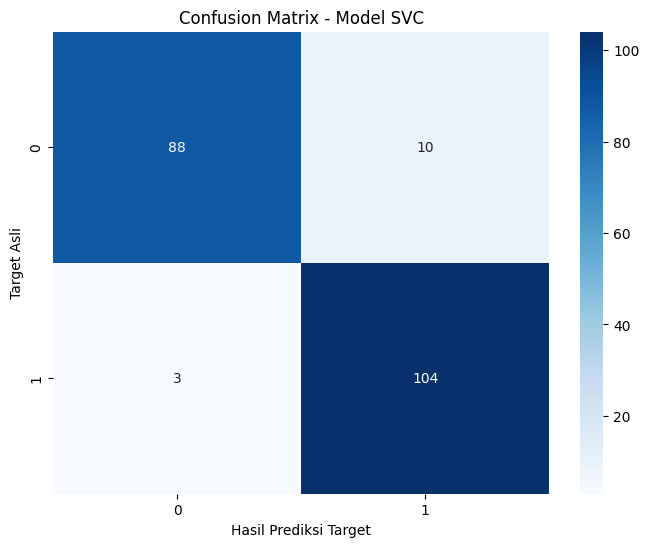

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

**a. Membangun Model Klasifikasi | Decision Tree**

---



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
# Menggunakan metode fit untuk melatih model pada data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

**b. Uji dan Evaluasi Model Decision Tree**

---



In [11]:
# Melakukan prediksi pada data testing
dt_predicted = dt.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
# Menghitung akurasi model
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\n")
# Menampilkan akurasi model
print("Nilai Akurasi untuk model DecisionTreeClassifier:", dt_acc_score * 100, '%\n')
# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[95  3]
 [ 8 99]]


Nilai Akurasi untuk model DecisionTreeClassifier: 94.6341463414634 %

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



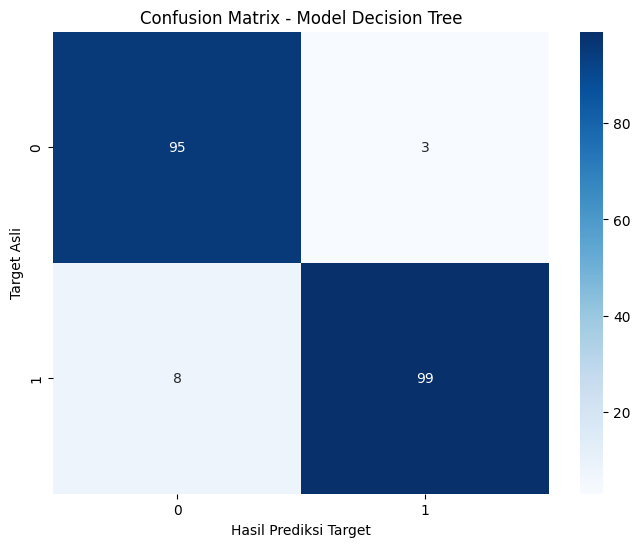

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

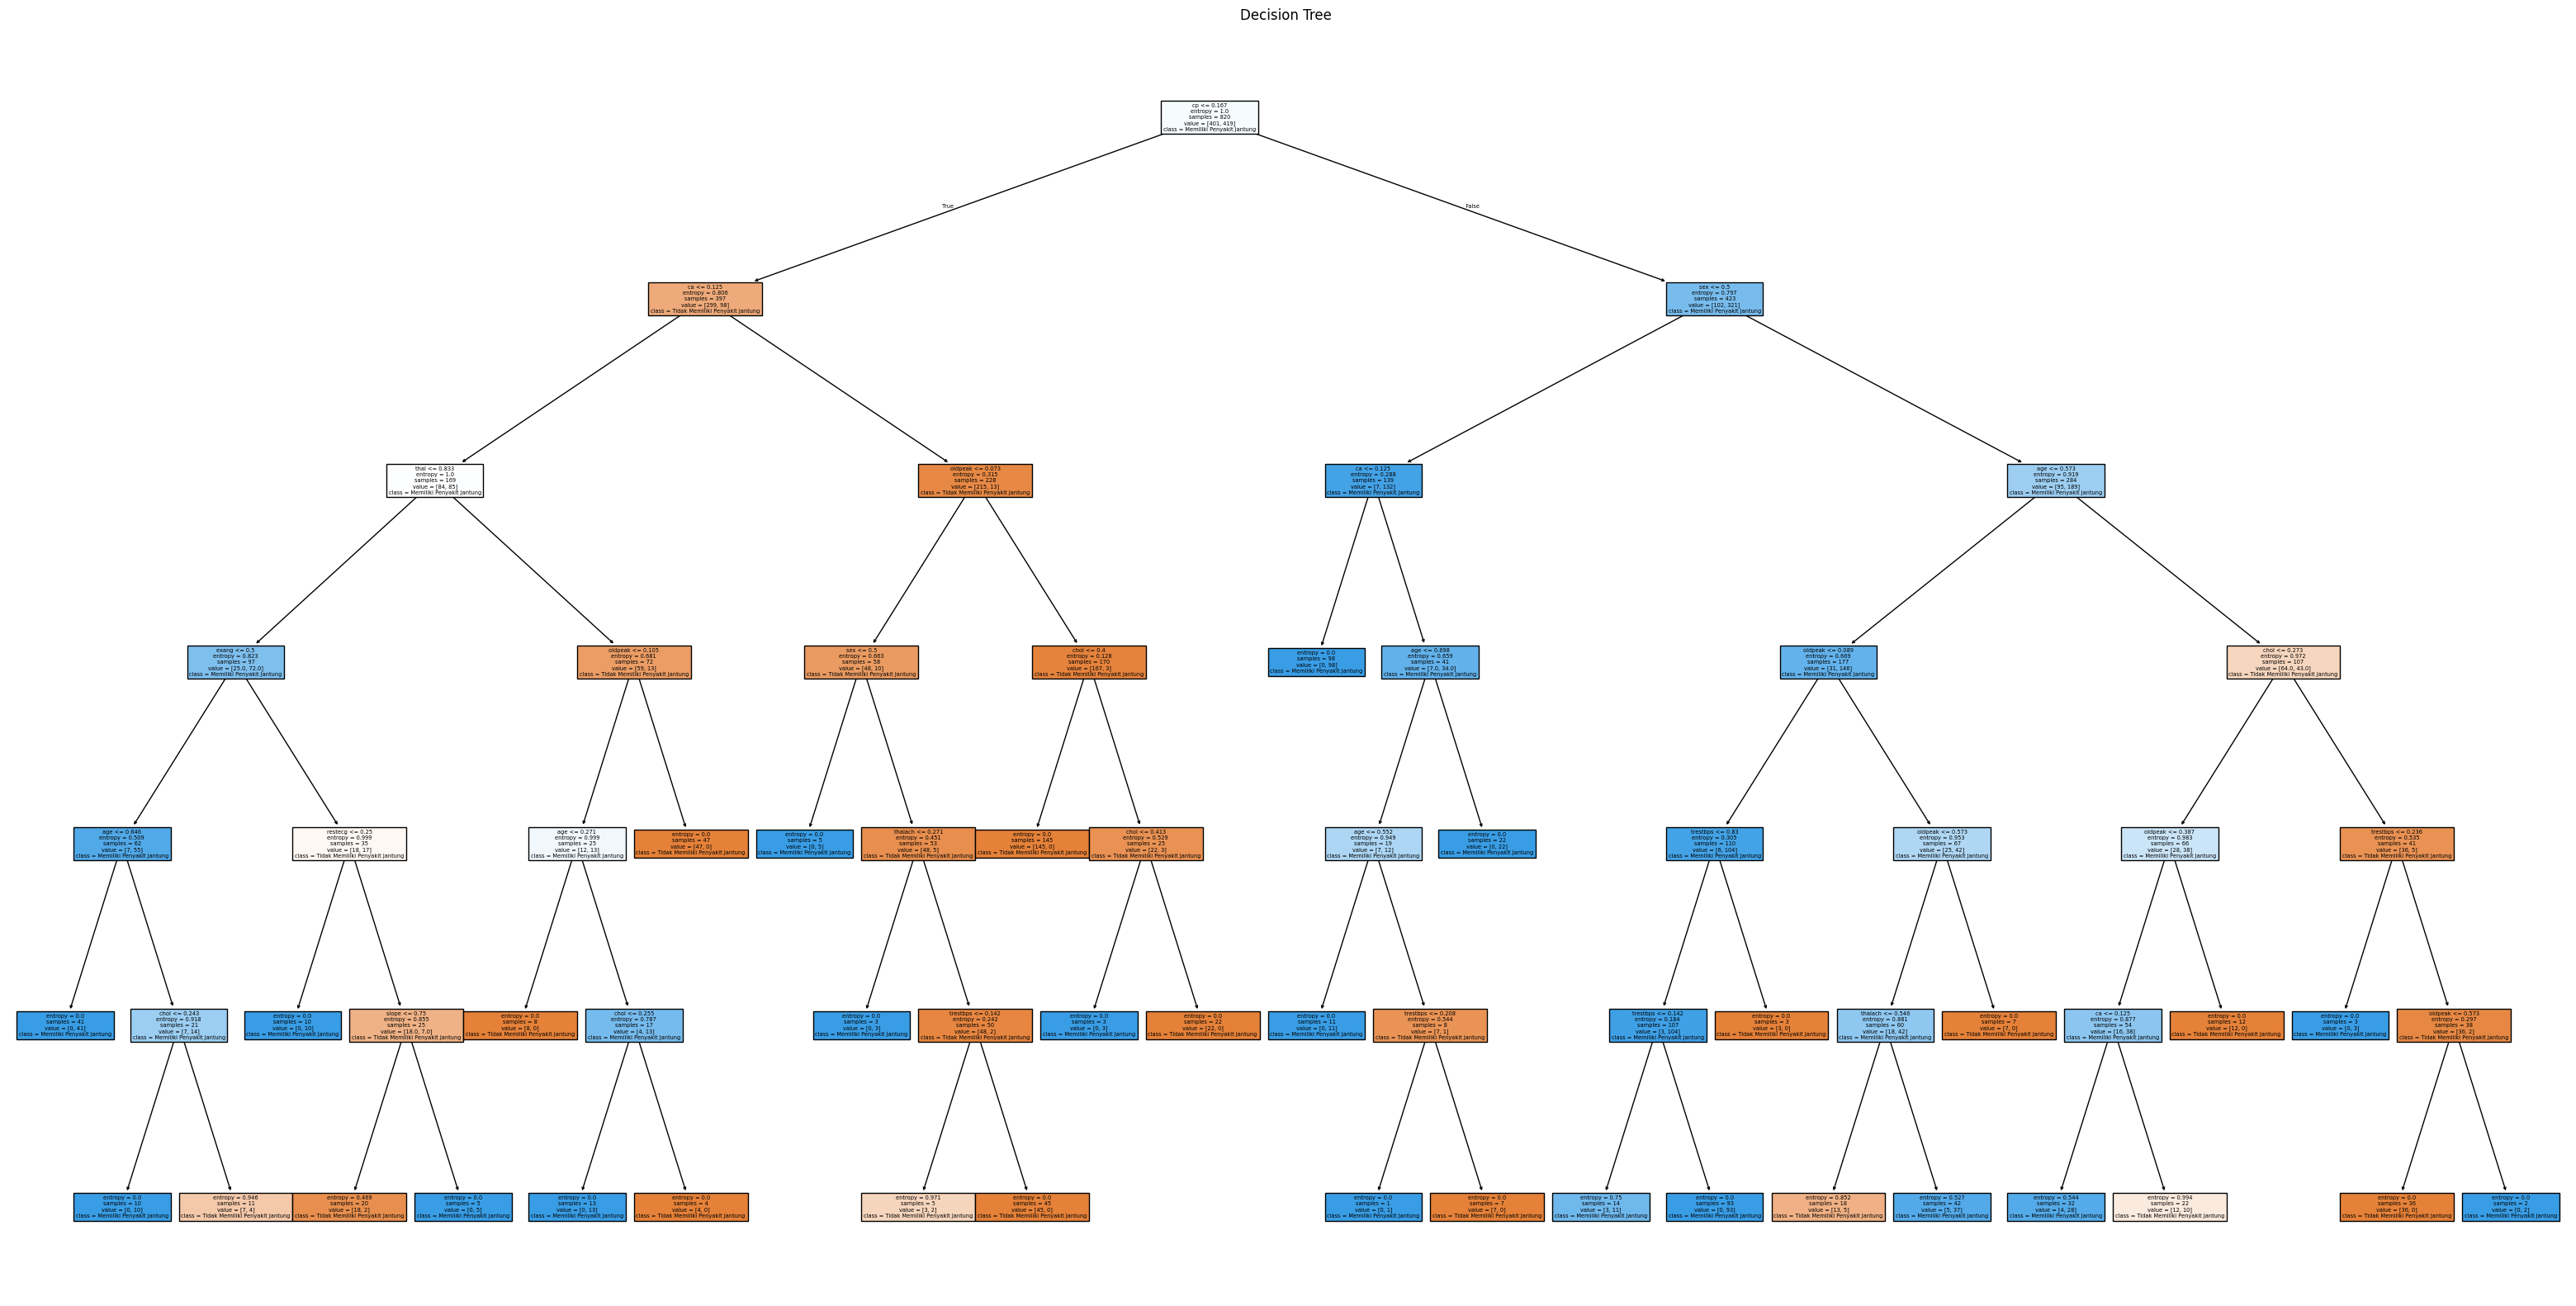

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Tidak Memiliki Penyakit Jantung', 'Memiliki Penyakit Jantung'])
plt.title('Decision Tree ')
plt.show()

* **Akar Pohon:** Pertanyaan pada akar pohon adalah "cp <= 0.167". Ini berarti pohon membagi data berdasarkan seberapa nyeri dada pasien pasien. -----> cp asli dari dataset berada di angka 0-3. Jadi,tiap node,valuenya sudah dalam bentuk skala
* **Cabang:** Cabang-cabang dari akar pohon menunjukkan berbagai kemungkinan jawaban atas pertanyaan di akar pohon, seperti True (kiri) / False(Kanan)
* **Node:** Node internal pada pohon mewakili pertanyaan atau karakteristik lain yang digunakan untuk membagi data lebih lanjut.
* **Daun:** Daun pada pohon menunjukkan klasifikasi akhir pasien, yaitu "Memiliki Penyakit Jantung" atau "Tidak Memiliki Penyakit Jantung"

**a. Membangun Model Klasifikasi | Regresi Logistik**

---



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi dan latih model regresi logistik
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

b. Uji dan Evaluasi Model | Regresi Logistik

---



In [15]:
# Prediksi menggunakan model yang dilatih
lr_predicted = lr_model.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)

# Menghitung akurasi model
lr_acc_score = accuracy_score(y_test, lr_predicted)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\n")

# Menampilkan akurasi model
print("Nilai Akurasi untuk model Logistic Regression:", lr_acc_score * 100, '%\n')

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, lr_predicted))

Confusion Matrix:
[[77 21]
 [ 8 99]]


Nilai Akurasi untuk model Logistic Regression: 85.85365853658537 %

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



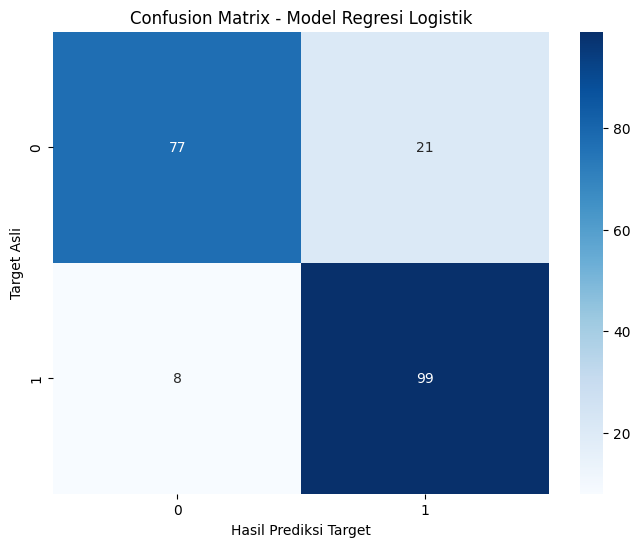

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Regresi Logistik")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


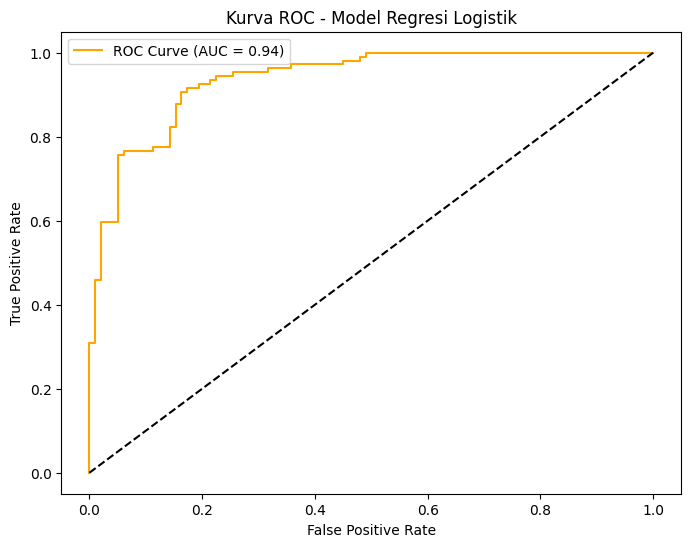

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Prediksi probabilitas untuk kelas 1
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Mendapatkan nilai fpr, tpr, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Menghitung Area Under ROC Curve (AUC)
auc = roc_auc_score(y_test, lr_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Model Regresi Logistik')
plt.legend()
plt.show()

Kurva ROC pada gambar menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai nilai threshold klasifikasi. Kurva ini membantu dalam mengevaluasi kinerja model klasifikasi dalam membedakan antara pasien dengan penyakit jantung (kelas positif) dan pasien tanpa penyakit jantung (kelas negatif).

**Kurva ROC - Model Regresi Logistik**
* Nilai AUC: 0.94
* Tingkat Akurasi: 86%

# Nilai Akurasi Model

Model Machine Learning yang telah dibuat memiliki nilai akurasi yang baik :

1. SVC Memiliki Nilai Akurasi sebesar = 93.65853658536587 %
2. Decision Tree Memiliki Nilai Akurasi sebesar = 94.6341463414634 %
3. Regresi Logistik Memiliki Nilai Akurasi sebesar = 85.85365853658537 %